In [17]:
%%html
<style>
table,td,tr,th {border:none!important}

container {
    text-align: center;
}
a, figure {
    display: inline-block;
}
figcaption {
    margin: 6px 0 0 0;
    font-size: 18px;
    font-variant: small-caps;
    font-family: Arial;
    font-weight: bold;
    color: #bb3333;
}
figure {
    padding: 5px;
}
img:hover {
    transform: scale(1.1);
    -ms-transform: scale(1.1);
    -webkit-transform: scale(1.1);
    -moz-transform: scale(1.1);
    -o-transform: scale(1.1);
}
img {
    transition: transform 0.2s;
    -webkit-transition: -webkit-transform 0.2s;
    -moz-transition: -moz-transform 0.2s;
    -o-transition: -o-transform 0.2s;
}

</style>

# Uso de Jupyter Notebooks en la docencia del máster de Ingeniería Informática

<table border="0" cellpadding="0" cellspacing="0">
        <td border="0" cellpadding="0" cellspacing="0"><img src="images/innova_jupyter.png" width="100" height="100"></td>
        <td border="0" cellpadding="0" cellspacing="0"><img src="images/innova_python.png" width="200" height="200"></td>
</table>


## Autores: 
- Pedro González Yanes (Centro de Cálculo de ESIT)
- Carlos Pérez González (Departamento de Matemáticas, Estadística e Investigación Operativa)


# ¿Qué es Jupyter?

* El Jupyter Notebook es un entorno interactivo web que permite ejecutar código de ciertos programas:

<div id="container">
    <a >
        <figure>
            <img src="images/innova_R.jpg" width="80px" height="80px" />
            <figcaption>R (statistical analysis)</figcaption>
        </figure>
    </a>
    <a >
        <figure>
             <img src="images/innova_python.jpg" width="80px" height="80px" />
            <figcaption>Python (general purpose)</figcaption>
        </figure>
    </a>
    <a >
        <figure>
             <img src="images/innova_julia.png" width="80px" height="80px" />
            <figcaption>Julia (numerical computing)</figcaption>
        </figure>
    </a>
    <a >
        <figure>
             <img src="images/innova_octave.jpg" width="80px" height="80px" />
            <figcaption>Octave</figcaption>
        </figure>
    </a>
</div>

* El alumno utiliza sólo un navegador (no es necesario instalar ningún programa) y puede introducir instrucciones a través de un cuaderno de trabajo (notebook) muy sencillo de manejar.
* Cada vez que se ejecuta una instrucción, ésta se procesa por el servidor y envía el resultado al notebook.
* El entorno permite que el alumno tenga un espacio de trabajo personal donde puede crear nuevos notebooks en los que trabajar y realizar las diferentes tareas .
* Al finalizar, el alumno puede descargar su notebook y enviarlo al profesor para su evaluación.




## ¿Cómo accede el usuario a su espacio de trabajo?

* El alumno utiliza su usuario y password de ULL para entrar a su entorno personal de jupyter:

<img align="" src="images/innova_jupyter_hub_login.PNG" width="900" height="900">

* Y es en este entorno donde puede crear sus propios notebooks:

<img align="" src="images/innova_jupyter_new_notebook.PNG" width="900" height="1800">

## ¿Qué aspecto presenta el notebook de jupyter?

* El notebook tiene el siguiente aspecto:

<img align="" src="images/innova_jupyter_new_notebook2.PNG" width="900" height="2500">



* Permite introducir código (operaciones de cálculo, gráficos, etc..), etiquetas, ecuaciones $\LaTeX$, ... así como descragar el notebook en múltiples formatos
* Los alumnos pueden editar y ejecutar en vivo el código
* Se puede crear una versión estática del notebook para que otros la puedan ver 
* Tiene un enorme interés por lo que supone para la **Investigación reproducible** 

#### operaciones de cálculo analítico

In [6]:
%%latex
$$ \int x^2  \exp(x)  \cos(x) dx $$

<IPython.core.display.Latex object>

In [7]:
from sympy import *
x = symbols('x')
pprint(integrate(x**2 * exp(x) * cos(x), x))

 2  x           2  x                         x           x       
x ⋅ℯ ⋅sin(x)   x ⋅ℯ ⋅cos(x)      x          ℯ ⋅sin(x)   ℯ ⋅cos(x)
──────────── + ──────────── - x⋅ℯ ⋅sin(x) + ───────── - ─────────
     2              2                           2           2    


#### representación de gráficos

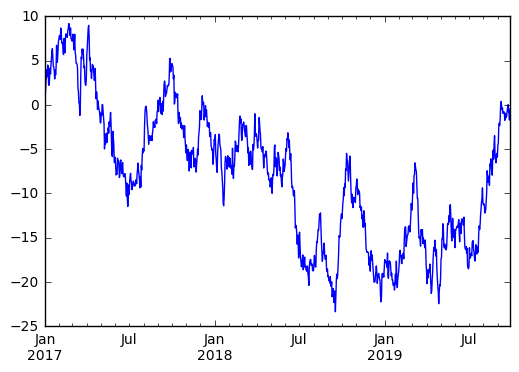

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range('01/01/2017', periods=1000))
ts = ts.cumsum()
ts.plot()

## Ejercicios propuestos a los alumnos del máster de Ingeniería Informática

<h2> Lab: Análisis de los gastos en tarjetas black de Bankia </h2>


<img align="left" src="images/tarjetas-black.jpg" width="200" height="200">

In [3]:
from pyspark import SparkContext, SQLContext
sc =SparkContext()

### Question 1

Load data in fraude/movimientos_tarjetas_black_caja_madrid.csv

In [4]:
sqlContext = SQLContext(sc)

def answer_one():
    df = sqlContext.read.format('com.databricks.spark.csv') \
                    .options(header='true', inferschema='true', delimiter=';') \
                    .load('file:///home/jovyan/work/Presentacion/fraude/movimientos_tarjetas_black_caja_madrid.csv')
    return df

df=answer_one() 
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- nombre: string (nullable = true)
 |-- importe: double (nullable = true)
 |-- nombre_comercio: string (nullable = true)
 |-- actividad: string (nullable = true)
 |-- operacion: string (nullable = true)
 |-- fecha: timestamp (nullable = true)
 |-- fechayear: integer (nullable = true)
 |-- fechamonth: integer (nullable = true)
 |-- fechaday-of-month: integer (nullable = true)
 |-- fechaday-of-week: integer (nullable = true)
 |-- hora: string (nullable = true)
 |-- horahour: integer (nullable = true)
 |-- horaminute: integer (nullable = true)
 |-- horasecond: integer (nullable = true)



### Question 2

Obtain the 10 persons with the highest amount of expenses

In [5]:
import pandas as pd
def answer_four():
    df_mapped=df.select('nombre','importe').rdd.map(lambda x: (x[0],x[1])) 
    df_reduced=df_mapped.reduceByKey(lambda x,y:x+y)
    df_top=df_reduced.map(lambda x:(x[1],x[0])).sortByKey(ascending=False)
    return df_top

persons=answer_four()

pd.DataFrame(persons.take(10), columns=["Gasto", "Ejecutivo"])  

,Gasto,Ejecutivo
0,572185.49,"SÁNCHEZ BARCOJ, ILDEFONSO JOSÉ"
1,447769.73,"MORAL SANTÍN, JOSÉ ANTONIO"
2,443999.19,"MORADO IGLESIAS, RICARDO"
3,429272.16,"AMAT ROCA, MATÍAS"
4,423068.49,"BLESA DE LA PARRA, MIGUEL"
5,389450.35,"FERRAZ RICARTE, RAMÓN"
6,354171.00,"PÉREZ CLAVER, MARIANO"
7,304818.36,"TORRE MARTÍNEZ, ENRIQUE DE LA"
8,287121.20,"ASTORQUI PORTERA, JUAN MANUEL"
9,284404.42,"DE LA MERCED MONGE, MARÍA MERCEDES"
